In [47]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

df = pd.read_csv('C:\\Users\\Administrador\\Desktop\\Data Scientist\\Data Science\\Proyecto\\GitHub\\Proyecto_DataScience_Coder\\data\\BTC_Data_final.csv')
print(df.dtypes)
df['Date']=pd.to_datetime(df['Date'])
print(df['Date'].dtypes)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

df.head(1)

Date                       object
priceUSD                  float64
size                      float64
sentbyaddress               int64
transactions                int64
mining_profitability      float64
sentinusd                 float64
transactionfees           float64
median_transaction_fee    float64
confirmationtime          float64
marketcap                   int64
transactionvalue          float64
mediantransactionvalue    float64
tweets                      int64
google_trends             float64
fee_to_reward             float64
activeaddresses             int64
top100cap                 float64
dtype: object
datetime64[ns]


,Date,priceUSD,size,sentbyaddress,transactions,mining_profitability,sentinusd,transactionfees,median_transaction_fee,confirmationtime,marketcap,transactionvalue,mediantransactionvalue,tweets,google_trends,fee_to_reward,activeaddresses,top100cap,Year,Month
0,2014-04-09,447.11,243742.0,122401,64992,38.678,239212041.0,0.139,0.0447,8.944,5587996110,4115.0,100.42,8193,11.193,0.502,179274,19.211,2014,4


In [48]:
df_log = pd.DataFrame

df['PriceUSD_log'] = np.log(df['priceUSD'])
df['transactions_log'] = np.log(df['transactions'])
df['tweets_log'] = np.log(df['tweets'])
df_log = df.drop(columns=['priceUSD', 'transactions', 'tweets'])
df_log.head(1)

c:\Users\Administrador\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Date,size,sentbyaddress,mining_profitability,sentinusd,transactionfees,median_transaction_fee,confirmationtime,marketcap,transactionvalue,mediantransactionvalue,google_trends,fee_to_reward,activeaddresses,top100cap,Year,Month,PriceUSD_log,transactions_log,tweets_log
0,2014-04-09,243742.0,122401,38.678,239212041.0,0.139,0.0447,8.944,5587996110,4115.0,100.42,11.193,0.502,179274,19.211,2014,4,6.102805,11.082019,9.011035


In [49]:
df_log['tweets_log'].describe()

count    3180.000000
mean            -inf
std              NaN
min             -inf
25%         9.994778
50%        10.315316
75%        11.226010
max        12.803716
Name: tweets_log, dtype: float64

In [50]:
count_inf = np.isinf(df_log['tweets_log']).sum()
print("Cantidad de valores -inf:", count_inf)

Cantidad de valores -inf: 56


In [57]:
df_log = df_log[~np.isinf(df_log['tweets_log'])]

In [58]:
df_log['tweets_log'].describe()

count    3124.000000
mean       10.585935
std         0.746128
min         6.098074
25%        10.015085
50%        10.329931
75%        11.249708
max        12.803716
Name: tweets_log, dtype: float64

In [59]:
correlation_matrix = df_log.corr()

print("Matriz de correlación:")
print(correlation_matrix)

Matriz de correlación:
                            size  sentbyaddress  mining_profitability  \
size                    1.000000       0.704995             -0.569438   
sentbyaddress           0.704995       1.000000             -0.546385   
mining_profitability   -0.569438      -0.546385              1.000000   
sentinusd               0.098225       0.454563             -0.163238   
transactionfees         0.354361       0.390257             -0.100044   
median_transaction_fee  0.364739       0.374568             -0.082999   
confirmationtime        0.236675       0.049658             -0.194359   
marketcap               0.142879       0.588032             -0.237884   
transactionvalue        0.022834       0.436175             -0.167436   
mediantransactionvalue  0.367027       0.516139             -0.161433   
google_trends           0.385567       0.546752             -0.195986   
fee_to_reward           0.611889       0.463602             -0.164128   
activeaddresses         0.65

C:\Users\Administrador\AppData\Local\Temp\ipykernel_9780\3503795895.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_log.corr()


In [60]:
correlation_coefficient = correlation_matrix.loc['PriceUSD_log', 'transactions_log']
correlation_coefficient_tweets = correlation_matrix.loc['PriceUSD_log', 'tweets_log']
print("Coeficiente de correlación entre PriceUSD_log y transactions_log:", correlation_coefficient)
print("Coeficiente de correlación entre PriceUSD_log y tweets:", correlation_coefficient_tweets)

Coeficiente de correlación entre PriceUSD_log y transactions_log: 0.6409837686384662
Coeficiente de correlación entre PriceUSD_log y tweets: 0.6735927688576421


In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

x = df_log[['PriceUSD_log']]
y = df_log[['transactions_log']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10000)

modelo = LinearRegression()
modelo.fit(x_train, y_train)

y_pred = modelo.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
mediana = df_log['transactions_log'].median()
print('Error Cuadrático Medio (MSE):', mse)
print('Error Cuadrático Medio Raíz (RMSE):', rmse)
print("La mediana de transacciones es:", mediana)
print("El RMSE de este modelo representa el ", rmse/mediana*100 , "%", "de la mediana de transacciones." )

Error Cuadrático Medio (MSE): 0.13226543843404973
Error Cuadrático Medio Raíz (RMSE): 0.3636831566543187
La mediana de transacciones es: 12.442389052484504
El RMSE de este modelo representa el  2.922936705485015 % de la mediana de transacciones.


In [62]:
x = df_log[['PriceUSD_log']]
y = df_log[['tweets_log']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10000)

modelo = LinearRegression()
modelo.fit(x_train, y_train)

y_pred = modelo.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
mediana = df_log['tweets_log'].median()
print('Error Cuadrático Medio (MSE):', mse)
print('Error Cuadrático Medio Raíz (RMSE):', rmse)
print("La mediana de transacciones es:", mediana)
print("El RMSE de este modelo representa el ", rmse/mediana*100 , "%", "de la mediana de transacciones." )

Error Cuadrático Medio (MSE): 0.332915348964584
Error Cuadrático Medio Raíz (RMSE): 0.5769881705586207
La mediana de transacciones es: 10.329931066496755
El RMSE de este modelo representa el  5.585595555714564 % de la mediana de transacciones.


c:\Users\Administrador\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


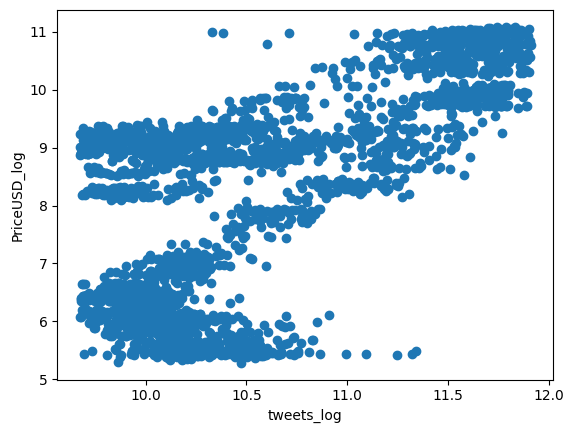

In [66]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

X = df_log[['tweets_log']]

isof = IsolationForest(n_estimators=100, contamination=0.05, random_state=0)
isof.fit(X)

outlier_labels = isof.predict(X)

outlier_mask = outlier_labels == -1

df_log = df_log[~outlier_mask]

plt.scatter(df_log['tweets_log'], df_log['PriceUSD_log'])
plt.xlabel('tweets_log')
plt.ylabel('PriceUSD_log')
plt.show()

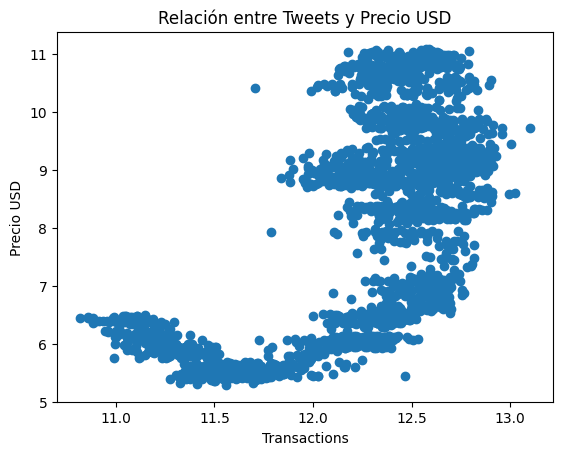

In [68]:
import matplotlib.pyplot as plt

# crea una figura y un eje
fig, ax = plt.subplots()

# grafica los puntos
ax.scatter(df_log['transactions_log'], df_log['PriceUSD_log'])

# establece el título y los nombres de los ejes
ax.set_title('Relación entre Tweets y Precio USD')
ax.set_xlabel('Transactions')
ax.set_ylabel('Precio USD')

# muestra el gráfico
plt.show()